# 🟩 나에게 맞는 커스텀 데이터셋 만들기  

<br>

## 🟢 커스템 데이터셋 클래스 만들기  

In [67]:
import torch  # 훈련
from torch.utils.data import Dataset, DataLoader  # 커스텀 데이터셋을 만들기 위함

# PIL(Pillow) 라이브러리의 Image: 파이썬에서 이미지를 불러오고 다룰 때 사용하는 기본적인 도구입니다.
from PIL import Image

class CustomData(Dataset):
    # path가 
    def __init__(self, path, transform):
        self.image_path = path 
        self.transform = transform 

    def __len__(self):
        # if (이미지수 == 라벨수) return 이미지 수
        return len(self.image_path)
        # __len__은 DataLoader가 전체 데이터 개수를 알기 위해 호출합니다.

    # 텐서 형태로 변환된 이미지를 돌려줌
    def __getitem__(self, idx):
        image = self.image_path[idx]
        # image 변수는 '파일 경로 문자열'입니다. 주석과 혼동하면 안 됩니다(이미지가 아님).
        # 예: image == "data/img_001.jpg"

        image = Image.open(image)  # 해당 경로에서 이미지를 읽어 옴

        if self.transform is not None:
            result = self.transform(image)

        # csv,파일 이름 등을 이용해서 데이터에 맞는 라벨을 반환
        label = 1
        
        return result, label

<br>

## 🟢 path (동영상 경로)  

### 🟡 class별 동영상 path 지정 (`동영상별 path` list가 만듬)  

In [68]:
import os  # 로컬 컴퓨터에서 파일 및 폴더 컨트롤 라이브러리

origin = "C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\"

human_accident_class = os.listdir(origin)

video_path = []

for accident_class in human_accident_class:
    for x in os.listdir(origin + accident_class):
        video_path.append(os.path.join(origin, accident_class, x))

print(video_path)

['C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0001_cctv1.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0005_cctv2.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0006_cctv2.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0021_cctv2.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0047_cctv3.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0049_cctv4.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0053_cctv4.avi'

<br>

## 🟢 transforms (전처리 방식)  

### 🟡 동영상 프레임 정보 가져오기 (CV2)  

In [69]:
import cv2

video_average_frame = []

for i in video_path:

    cap = cv2.VideoCapture(i)

    # 영상 속성 가져오기
    fps = int(cap.get(cv2.CAP_PROP_FPS))  # 동영상의 fps를 확인
    video_average_frame.append(fps)
    # print(f"fps : {fps}")
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # 동영상의 넓이 확인
    # print(f"width : {width}")
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # 동영상의 높이 확인
    # print(f"height : {height}")

video_frame_type = [x for x in tuple(set(video_average_frame))]
video_count = len(video_average_frame)

print(video_average_frame)
print("프레임 종류 파악: ", video_frame_type)
print(video_count, "개 동영상 존재")

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,

In [74]:
video_average_frame

[30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,


### 🟡 히스토그램 (그래프) - X축: 비디오 갯수 | Y축: 프레임 길이  

seaborn  
sns.hist 로 출력  

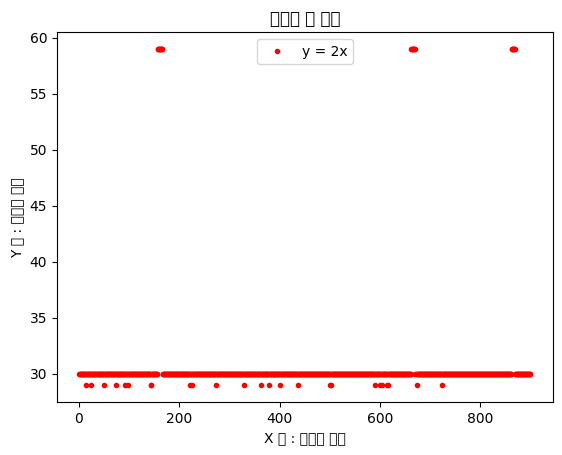

In [70]:
import matplotlib.pyplot as plt  # 이미지 시각화


# 데이터 준비
# X축 프레임 길이 | Y축 비디오 갯수
x = list(range(1, video_count + 1))  # 동영상 번호 (1,2,3,...)
y = video_average_frame  # 각 동영상 fps

# 그래프 그리기
plt.plot(x, y, marker=".", linestyle="", color="r", label="y = 2x")

# 축 이름 붙이기
plt.xlabel("X 값 : 프레임 길이")
plt.ylabel("Y 값 : 비디오 갯수")

# 그래프 제목
plt.title("프레임 수 확인")

# 범례 추가
plt.legend()

# 화면에 출력
plt.show()

### 🟡 Video 통일하기  
- 900개 영상을 읽어서 → 프레임 추출 → 전처리 후 → 하나의 배열로 합쳐야 합니다.  

- 커스텀 데이터셋 클래스에 비디오를 통일시키는 함수가 하나 더 들어가야합니다.  
    - 30fps가 아닌 경우에는 처리하는 함수가 필요하다  

### 🟡 테스트  

In [71]:
# import matplotlib.pyplot as plt  # 이미지 시각화

# image = plt.imread(video_path[0])

# plt.imshow(image)
# plt.show()


# # timage = torch.Tensor()
# # timage.shape

### 🟡 전처리 방법 정해주기  

In [72]:
# 여러 가지 전처리 방법을 하나로 묶어주는 transforms.Compose를 사용합니다.

# torchvision: PyTorch에서 이미지 처리/데이터셋 관련 기능을 제공하는 라이브러리
# 🔥transforms(전처리): 이미지의 크기를 조절하거나, 딥러닝 모델이 이해할 수 있는 텐서(Tensor) 형태로 변환하는 등 (자르기, 회전, 텐서 변환, 정규화 등)
#                       이미지 전처리(preprocessing) 기능을 담당합니다.
from torchvision import transforms

transform = transforms.Compose(
    [
        # 1. 이미지 크기 조절: 모든 이미지의 크기를 224x224 픽셀로 맞춥니다.
        transforms.Resize((224, 224)),
        # 2. 텐서(Tensor)로 변환: 이미지를 딥러닝 모델이 계산할 수 있는 숫자 행렬(텐서)로 바꿉니다.
        transforms.ToTensor(),
        # 3. 정규화(Normalize): 이미지의 픽셀 값 범위를 조정하여 모델이 더 빠르고 안정적으로 학습하도록 돕습니다.
        #    아래 mean과 std 값은 ImageNet 데이터셋에서 미리 계산된 값으로, 보통 그대로 많이 사용합니다.
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

<br><br>

---

## 🟢 사용  

In [73]:
# 이미지에 대한 경로, 일괄적으로 적용할 전처리 이 2가지를 인수로 넣어줌.
dataset = CustomData(video_path, transform)
# 🔥🔥🔥 어떻게 작용하는 것일까?


dataloader = DataLoader(
    dataset=dataset,  # 🔥🔥🔥 어떻게 작용하는 것일까?
    batch_size=25,
    shuffle=True,
    drop_last=False,  # 마지막에 남는 데이터도 사용합니다. (False: 버리지 않음)

    # time
)